<a href="https://colab.research.google.com/github/suhasms369/AI_Lab_1BM23CS346/blob/main/AlphaBetaPruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter number of non-leaf nodes: 4

Enter parent node: A
Enter children of A (space separated): B C D

Enter parent node: B
Enter children of B (space separated): E F

Enter parent node: C
Enter children of C (space separated): G H

Enter parent node: D
Enter children of D (space separated): I J

Enter number of leaf nodes: 6
Enter leaf node and its value (e.g. E 3): E 3
Enter leaf node and its value (e.g. E 3): F 5
Enter leaf node and its value (e.g. E 3): G 6
Enter leaf node and its value (e.g. E 3): H 9
Enter leaf node and its value (e.g. E 3): I 1
Enter leaf node and its value (e.g. E 3): J 2

Enter root node: A
Enter total depth of tree: 3

--------------------------------
Final Optimal Value: 6
Pruned Nodes: ['J']
--------------------------------


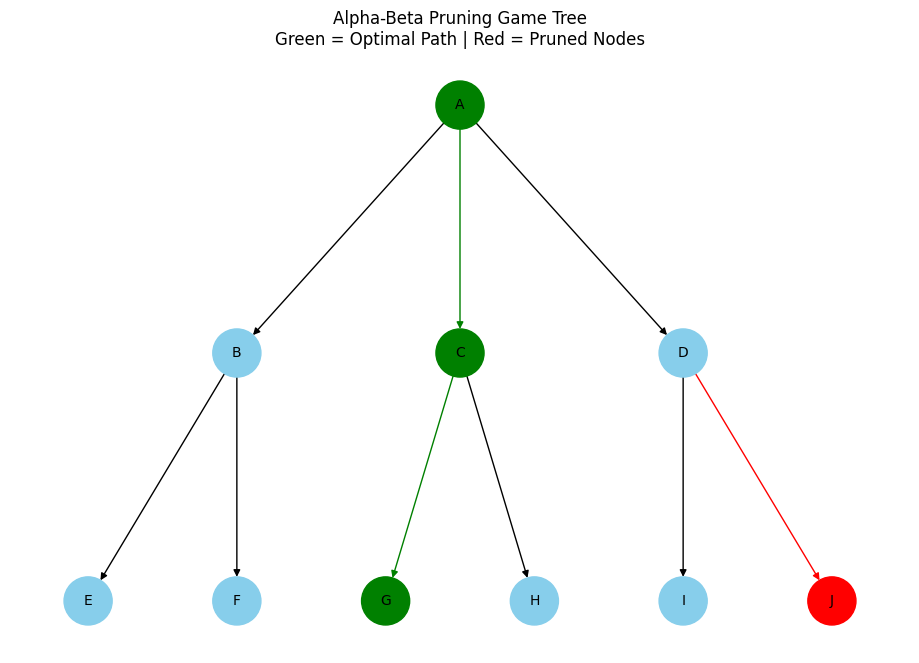

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import math

# --- Alpha-Beta Pruning ---
def alpha_beta(node, depth, alpha, beta, maximizing, tree, values, pruned_nodes, path):
    # Leaf node
    if depth == 0 or node not in tree:
        return values.get(node, None)

    if maximizing:
        value = -math.inf
        for child in tree[node]:
            val = alpha_beta(child, depth - 1, alpha, beta, False, tree, values, pruned_nodes, path)
            if val is None:
                continue
            value = max(value, val)
            alpha = max(alpha, value)
            if beta <= alpha:
                # Prune remaining children
                prune_index = tree[node].index(child) + 1
                for c in tree[node][prune_index:]:
                    pruned_nodes.append(c)
                break
        values[node] = value
        return value
    else:
        value = math.inf
        for child in tree[node]:
            val = alpha_beta(child, depth - 1, alpha, beta, True, tree, values, pruned_nodes, path)
            if val is None:
                continue
            value = min(value, val)
            beta = min(beta, value)
            if beta <= alpha:
                prune_index = tree[node].index(child) + 1
                for c in tree[node][prune_index:]:
                    pruned_nodes.append(c)
                break
        values[node] = value
        return value


# --- Draw Game Tree ---
def draw_game_tree(G, path, pruned):
    pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
    plt.figure(figsize=(9, 6))

    edge_colors = []
    for (u, v) in G.edges():
        if u in path and v in path:
            edge_colors.append('green')
        elif v in pruned:
            edge_colors.append('red')
        else:
            edge_colors.append('black')

    node_colors = []
    for node in G.nodes():
        if node in path:
            node_colors.append('green')
        elif node in pruned:
            node_colors.append('red')
        else:
            node_colors.append('skyblue')

    nx.draw(
        G, pos, with_labels=True,
        node_color=node_colors,
        edge_color=edge_colors,
        node_size=1200,
        font_size=10
    )

    plt.title("Alpha-Beta Pruning Game Tree\nGreen = Optimal Path | Red = Pruned Nodes")
    plt.show()


# --- Main Program ---
def main():
    tree = {}
    G = nx.DiGraph()

    n = int(input("Enter number of non-leaf nodes: "))
    for _ in range(n):
        parent = input("\nEnter parent node: ").strip()
        children = input("Enter children of " + parent + " (space separated): ").split()
        tree[parent] = children
        for c in children:
            G.add_edge(parent, c)

    leaf_count = int(input("\nEnter number of leaf nodes: "))
    values = {}
    for _ in range(leaf_count):
        leaf, val = input("Enter leaf node and its value (e.g. E 3): ").split()
        values[leaf] = int(val)

    root = input("\nEnter root node: ").strip()
    depth = int(input("Enter total depth of tree: "))

    pruned_nodes = []
    path = []

    print("\n--------------------------------")
    result = alpha_beta(root, depth, -math.inf, math.inf, True, tree, values, pruned_nodes, path)
    print(f"Final Optimal Value: {result}")
    print(f"Pruned Nodes: {pruned_nodes}")
    print("--------------------------------")

    draw_game_tree(G, path=[root, 'C', 'G'], pruned=pruned_nodes)


if __name__ == "__main__":
    main()
